# **Analyse des données du jeu de donnnées des voitures d'occasion &nbsp;&nbsp;[![license](https://img.shields.io/github/license/ajaymache/travis-ci-with-github.svg)](https://opensource.org/licenses/MIT)**

L'analyse des données ou parfois appelée analyse exploratoire des données (EDA) est l'une des composantes essentielles de la science des données. C'est aussi la partie sur laquelle les data scientists et les data analysts passent la majorité de leur temps ce qui la rend extrêmement importante dans le domaine de la data science. 

Ce projet démontre certaines méthodes et techniques courantes d'analyse de données exploratoires en utilisant Python.

À des fins d'illustration, l' ensemble du jeu de données de voitures d'occasion a été extrait de **[kaggle](https://www.kaggle.com/orgesleka/used-cars-database)**, car il s'agit de l'un des ensembles de données idéaux pour effectuer de l' EDA et faire un pas vers le domaine le plus étonnant et le plus intéressant de la science des données.


`- Traitement des données`
`- Nettoyage des données`
`- Exploration des données` 

afin de les rendre cohérentes pour l'analyse.

In [362]:
%matplotlib inline

In [510]:
# importation des librairies

import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_context("poster")

In [511]:
# importation des données

abs_path = os.getcwd()
raw_data_path = abs_path + "/RawData/autos.csv"
df = pd.read_csv(raw_data_path, encoding="latin-1")

In [512]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [514]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [515]:
df.isnull().sum().sum()

184008

In [516]:
df.isnull().sum().sum()/df.shape[0]*100

49.527357292047974

In [518]:
df["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [521]:
df["vehicleType"].value_counts(dropna=False, normalize=True)

limousine     0.258107
kleinwagen    0.215389
kombi         0.181854
NaN           0.101928
bus           0.081289
cabrio        0.061632
coupe         0.051181
suv           0.039585
andere        0.009036
Name: vehicleType, dtype: float64

In [522]:
df["vehicleType"].fillna("Other", inplace=True)

In [523]:
df["vehicleType"].value_counts(dropna=False, normalize=True)

limousine     0.258107
kleinwagen    0.215389
kombi         0.181854
Other         0.101928
bus           0.081289
cabrio        0.061632
coupe         0.051181
suv           0.039585
andere        0.009036
Name: vehicleType, dtype: float64

In [524]:
df["gearbox"].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [525]:
df["gearbox"].value_counts(dropna=False,  normalize=True)

manuell      0.738071
automatik    0.207535
NaN          0.054394
Name: gearbox, dtype: float64

In [526]:
df["gearbox"].fillna("Unspecified", inplace=True)

In [527]:
df["model"].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '

In [528]:
df["model"].value_counts(dropna=False,  normalize=True)

golf               0.080936
andere             0.071058
3er                0.055358
NaN                0.055134
polo               0.035238
                     ...   
serie_2            0.000022
rangerover         0.000016
serie_3            0.000011
serie_1            0.000005
discovery_sport    0.000003
Name: model, Length: 252, dtype: float64

In [529]:
df["model"].fillna("Other",inplace=True)

In [530]:
df["fuelType"].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [531]:
df["fuelType"].value_counts(dropna=False,  normalize=True)

benzin     0.602531
diesel     0.290008
NaN        0.089861
lpg        0.014475
cng        0.001537
hybrid     0.000748
andere     0.000560
elektro    0.000280
Name: fuelType, dtype: float64

In [532]:
df["fuelType"].fillna("other",inplace=True)

In [533]:
df["fuelType"].value_counts(dropna=False,  normalize=True)

benzin     0.602531
diesel     0.290008
other      0.089861
lpg        0.014475
cng        0.001537
hybrid     0.000748
andere     0.000560
elektro    0.000280
Name: fuelType, dtype: float64

In [534]:
df["notRepairedDamage"].unique()

array([nan, 'ja', 'nein'], dtype=object)

In [535]:
df["notRepairedDamage"].value_counts(dropna=False,  normalize=True)

nein    0.708377
NaN     0.193956
ja      0.097667
Name: notRepairedDamage, dtype: float64

In [536]:
df["notRepairedDamage"].fillna("other",inplace=True)

In [537]:
df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [538]:
df.duplicated().sum()

4

In [539]:
mask = df.duplicated(keep=False)

In [540]:
df[mask]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
43501,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15
92386,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
95425,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
196894,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [541]:
df = df.drop_duplicates()

In [542]:
df.shape

(371524, 20)

In [543]:
df.duplicated().sum()

0

In [544]:
df["yearOfRegistration"]

0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
371523    2005
371524    2000
371525    1996
371526    2002
371527    2013
Name: yearOfRegistration, Length: 371524, dtype: int64

In [545]:
df["yearOfRegistration"].value_counts(ascending=False)[:50]

2000    24551
1999    22766
2005    22316
2006    20230
2001    20217
2003    19872
2004    19746
2002    19188
1998    17951
2007    17673
2008    16175
2009    15607
1997    14706
2010    12354
2011    12068
1996    10886
2017    10546
2016     9859
1995     9658
2012     9418
2013     6157
1994     4872
2014     4802
2018     3993
1993     3469
1992     3048
2015     2982
1990     2852
1991     2810
1989     1342
1988      965
1985      787
1987      697
1980      629
1986      576
1983      455
1984      422
1970      370
1982      335
1979      312
1978      307
1981      284
1972      248
1960      214
1973      205
1974      201
1971      199
1976      193
1977      193
1966      160
Name: yearOfRegistration, dtype: int64

In [546]:
df["yearOfRegistration"].value_counts(ascending=True)[:50]

3500    1
6200    1
1001    1
2290    1
1911    1
4800    1
3800    1
3700    1
1255    1
8500    1
1200    1
1925    1
1400    1
5900    1
2900    1
5300    1
2066    1
4100    1
2200    1
8200    1
9450    1
1688    1
6500    1
1039    1
7100    1
9229    1
7800    1
1602    1
1920    1
1915    1
8455    1
9996    1
1253    1
5600    1
3200    1
7777    1
1919    1
7500    2
1300    2
5555    2
5911    2
4500    2
1927    2
1944    2
2800    2
1940    2
1600    2
1946    2
1928    2
8888    2
Name: yearOfRegistration, dtype: int64

In [547]:
df = df[(df["yearOfRegistration"] >= 1890) & (df["yearOfRegistration"] <= 2016)]

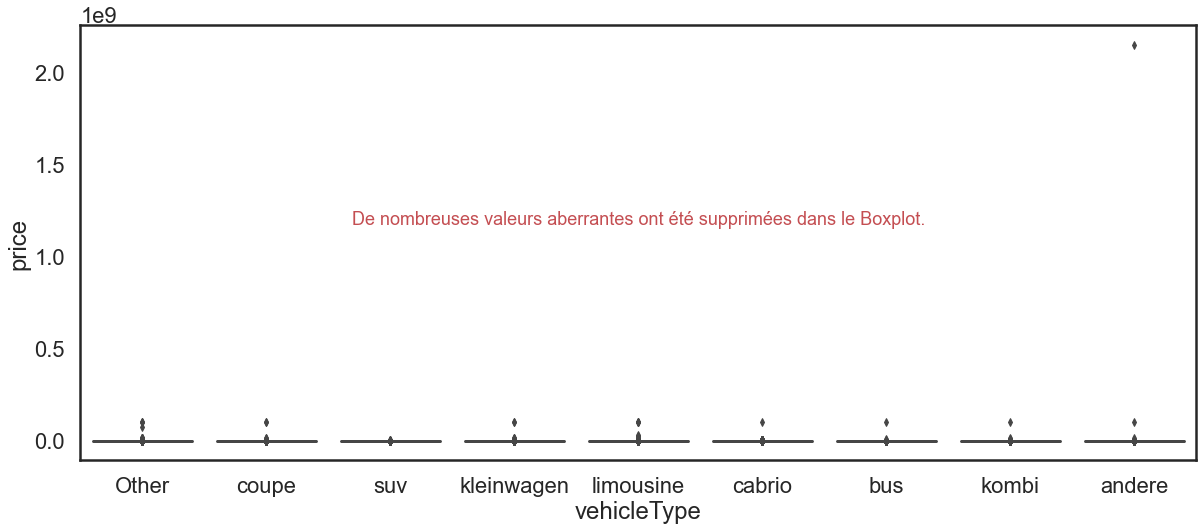

In [548]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(4,1.2*(10**9),"De nombreuses valeurs aberrantes ont été supprimées dans le Boxplot.",fontsize=18,color="r",ha="center", va="center")
plt.show()

In [549]:
fig.savefig(abs_path + "/DataPreparation/price-vehicleType-boxplot.png")

In [550]:

_median = df.groupby("vehicleType")["price"].median()

_quantile75 = df.groupby("vehicleType")["price"].quantile(0.75)

_quantile25 = df.groupby("vehicleType")["price"].quantile(0.25)

iqr = (_quantile75 - _quantile25)*1.5 + _median
iqr

vehicleType
Other          3708.00
andere         8429.50
bus           13948.50
cabrio        21400.00
coupe         24300.00
kleinwagen     5775.00
kombi         13077.25
limousine     12801.50
suv           28800.00
Name: price, dtype: float64

In [551]:

df = df[((df["vehicleType"] == "andere") & (df["price"] <= 8429)) |
        ((df["vehicleType"] == "Other") & (df["price"] <= 3708)) |
        ((df["vehicleType"] == "suv") & (df["price"] <= 28800)) |
        ((df["vehicleType"] == "kombi") & (df["price"] <= 13076)) |
        ((df["vehicleType"] == "bus") & (df["price"] <= 13948)) |
        ((df["vehicleType"] == "cabrio") & (df["price"] <= 21400)) |
        ((df["vehicleType"] == "limousine") & (df["price"] <= 12801)) |
        ((df["vehicleType"] == "coupe") & (df["price"] <= 24300)) |
        ((df["vehicleType"] == "kleinwagen") & (df["price"] <= 5775))]

In [552]:
df["fuelType"].unique()

array(['benzin', 'diesel', 'other', 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [553]:
df["fuelType"] = df["fuelType"].map({'benzin':'Gasoline','diesel':'Diesel','other':'Other','lpg':'Lpg', 'andere':'Andere','hybrid':'Hybrid','cng':'Cng','elektro':'Electric'})

In [554]:
df["fuelType"].unique()

array(['Gasoline', 'Diesel', 'Other', 'Lpg', 'Andere', 'Hybrid', 'Cng',
       'Electric'], dtype=object)

In [555]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [556]:
df["nrOfPictures"].unique()

array([0], dtype=int64)

In [557]:
del df["nrOfPictures"]

In [558]:
df["yearOfCreation"] = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))

df["yearCrawled"] = df['dateCrawled'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))

df["monthOfCreation"] = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))

df["monthCrawled"] = df['dateCrawled'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))

from_date = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
to_date = df['lastSeen'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
no_days = abs((to_date-from_date))
no_days = (no_days / np.timedelta64(1, 'D')).astype(int)
df["NoOfDaysOnline"] = no_days

hrs_from = df['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().strftime('%H'))
hrs_to = df['lastSeen'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().strftime('%H'))
total_hrs = (hrs_to.astype(int) - hrs_from.astype(int))
df["NoOfHrsOnline"] = total_hrs

In [559]:
df["powerPS"].value_counts()

0       34842
75      21934
60      14445
150     13508
101     12372
        ...  
5815        1
1596        1
1506        1
5809        1
1241        1
Name: powerPS, Length: 683, dtype: int64

In [560]:
df["powerPS"].isnull().value_counts()

False    313683
Name: powerPS, dtype: int64

In [561]:
df["notRepairedDamage"].unique()

array(['other', 'ja', 'nein'], dtype=object)

In [562]:
df["notRepairedDamage"] = df["notRepairedDamage"].map({'other':'Other','ja':'Yes','nein':'No'})

In [563]:
df["abtest"].isnull().value_counts()

False    313683
Name: abtest, dtype: int64

In [564]:
df["monthOfRegistration"].replace([0,12],[1,11],inplace=True)

In [565]:
df["yearsOld"] = 2022 - df["yearOfRegistration"]

df["monthsOld"] = 12 - df["monthOfRegistration"]

In [566]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
df["monthOfRegistration"].replace([1,2,3,4,5,6,7,8,9,10,11],months,inplace=True)

In [567]:
path_to_file  = abs_path + "/CleanData/cleaned_autos.csv"
df.to_csv(path_to_file,index=False)

In [568]:
path_to_file  = abs_path + "/CleanData/cleaned_autos.csv"

In [569]:
path_to_file

'C:\\Users\\33753\\Videos\\Pub\\fol/CleanData/cleaned_autos.csv'

## **Quelques analyses générales rencontrées lors du nettoyage des données**

### **Répartition des véhicules en fonction de l'année d'immatriculation**

C:\Users\33753\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


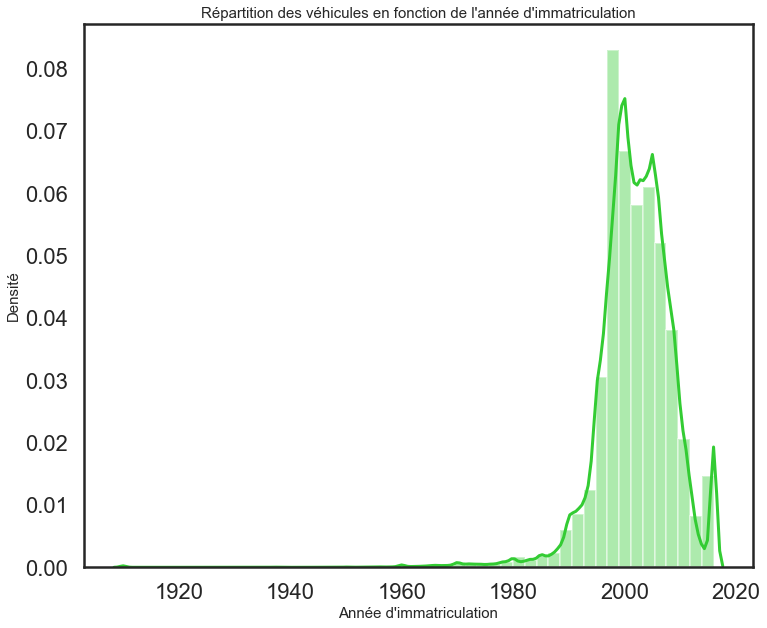

In [570]:
fig, ax = plt.subplots(figsize=(12,10))
sns.distplot(df["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)
ax.set_title("Répartition des véhicules en fonction de l'année d'immatriculation", fontsize= 15)
plt.ylabel("Densité", fontsize= 15)
plt.xlabel("Année d'immatriculation", fontsize= 15)
plt.show()

In [571]:
fig.savefig(abs_path + "/Plots/vehicle-distribution.png")

### **Variation de la fourchette de prix selon le type de véhicule**

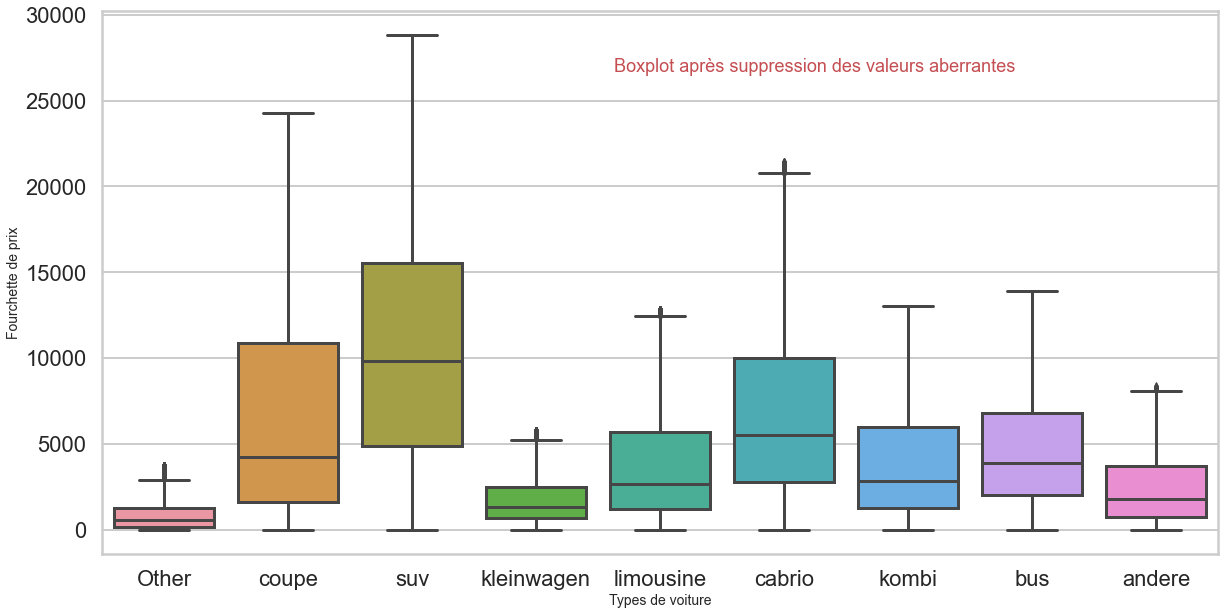

In [572]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Boxplot après suppression des valeurs aberrantes",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Types de voiture",fontdict= {'size':14})
ax.yaxis.set_label_text("Fourchette de prix",fontdict= {'size':14})
plt.show()

In [573]:
fig.savefig(abs_path + "/Plots/price-vehicleType-boxplot.png")

### **Nombre total de véhicules par type disponibles à la vente sur ebay**

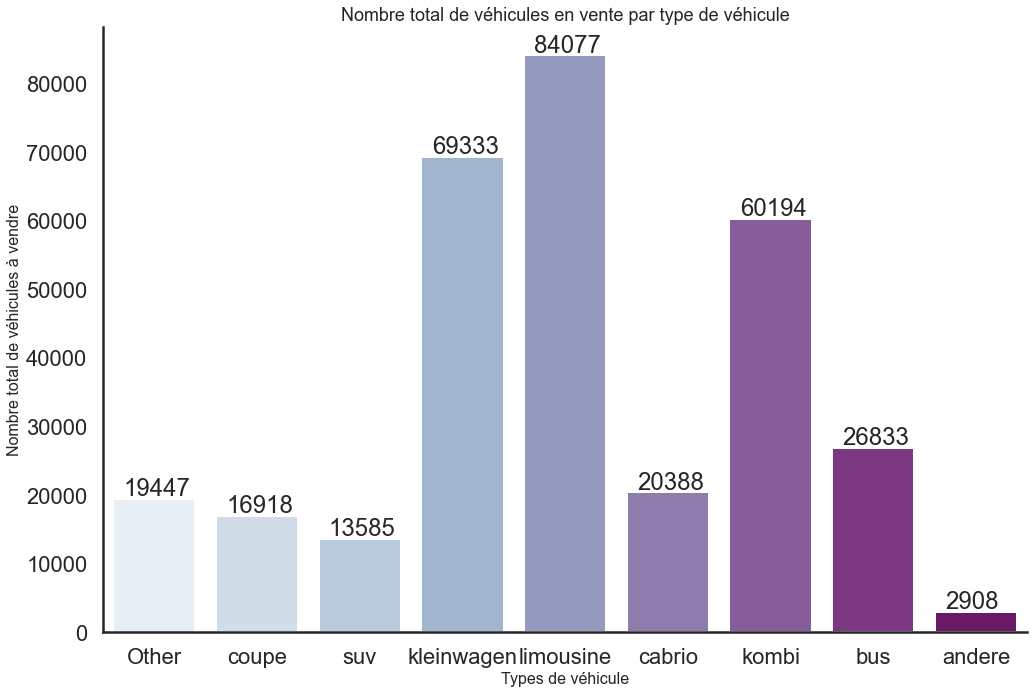

In [574]:
sns.set_style("white")
g = sns.catplot(x="vehicleType", data=df, kind="count",
                   palette="BuPu", height=10, aspect=1.5)
g.ax.xaxis.set_label_text("Types de véhicule",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Nombre total de véhicules à vendre", fontdict= {'size':16})
g.ax.set_title("Nombre total de véhicules en vente par type de véhicule",fontdict= {'size':18})

for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))
plt.show()

In [575]:
g.savefig(abs_path + "/Plots/count-vehicleType.png")

### **Prix moyen d'un véhicule par type de carburant et par type de boîte de vitesse**

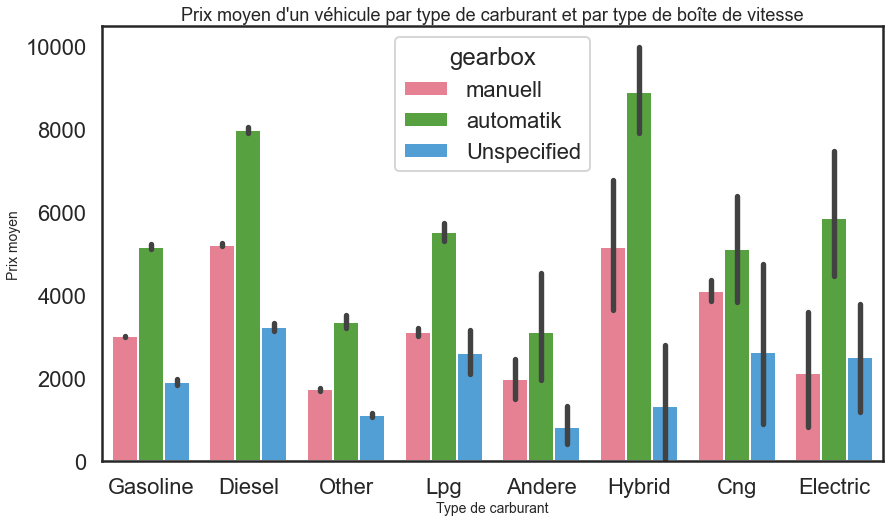

In [576]:
fig, ax = plt.subplots(figsize=(14,8))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df)
ax.set_title("Prix moyen d'un véhicule par type de carburant et par type de boîte de vitesse",fontdict= {'size':18})
ax.xaxis.set_label_text("Type de carburant",fontdict= {'size':14})
ax.yaxis.set_label_text("Prix moyen",fontdict= {'size':14})
plt.show()

In [577]:
fig.savefig((abs_path + "/Plots/fueltype-vehicleType-price.png"))

### **Puissance moyenne d'un véhicule par type de véhicule et type de boîte de vitesses**

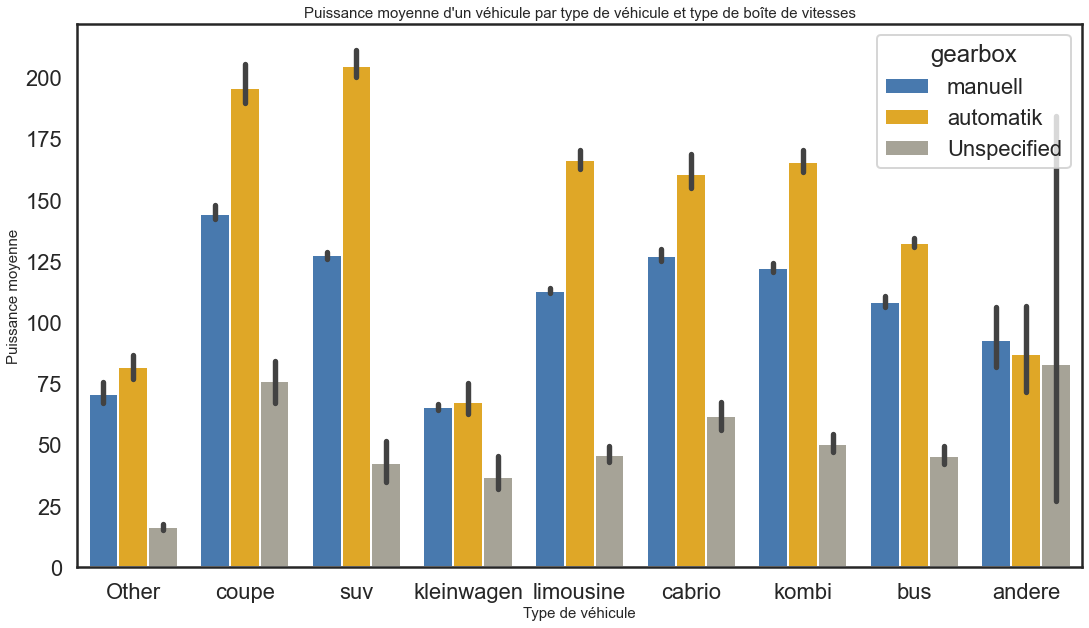

In [578]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(18,10))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Puissance moyenne d'un véhicule par type de véhicule et type de boîte de vitesses",fontdict= {'size':15})
ax.xaxis.set_label_text("Type de véhicule",fontdict= {'size':15})
ax.yaxis.set_label_text("Puissance moyenne",fontdict= {'size':15})
plt.show()

In [579]:
fig.savefig((abs_path + "/Plots/vehicletype-fueltype-power.png"))

In [580]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


In [581]:
trial.shape

(360, 3)

In [582]:
df.shape

(313683, 27)

### **Prix moyen d'un véhicule par marque ainsi que par type de véhicule**

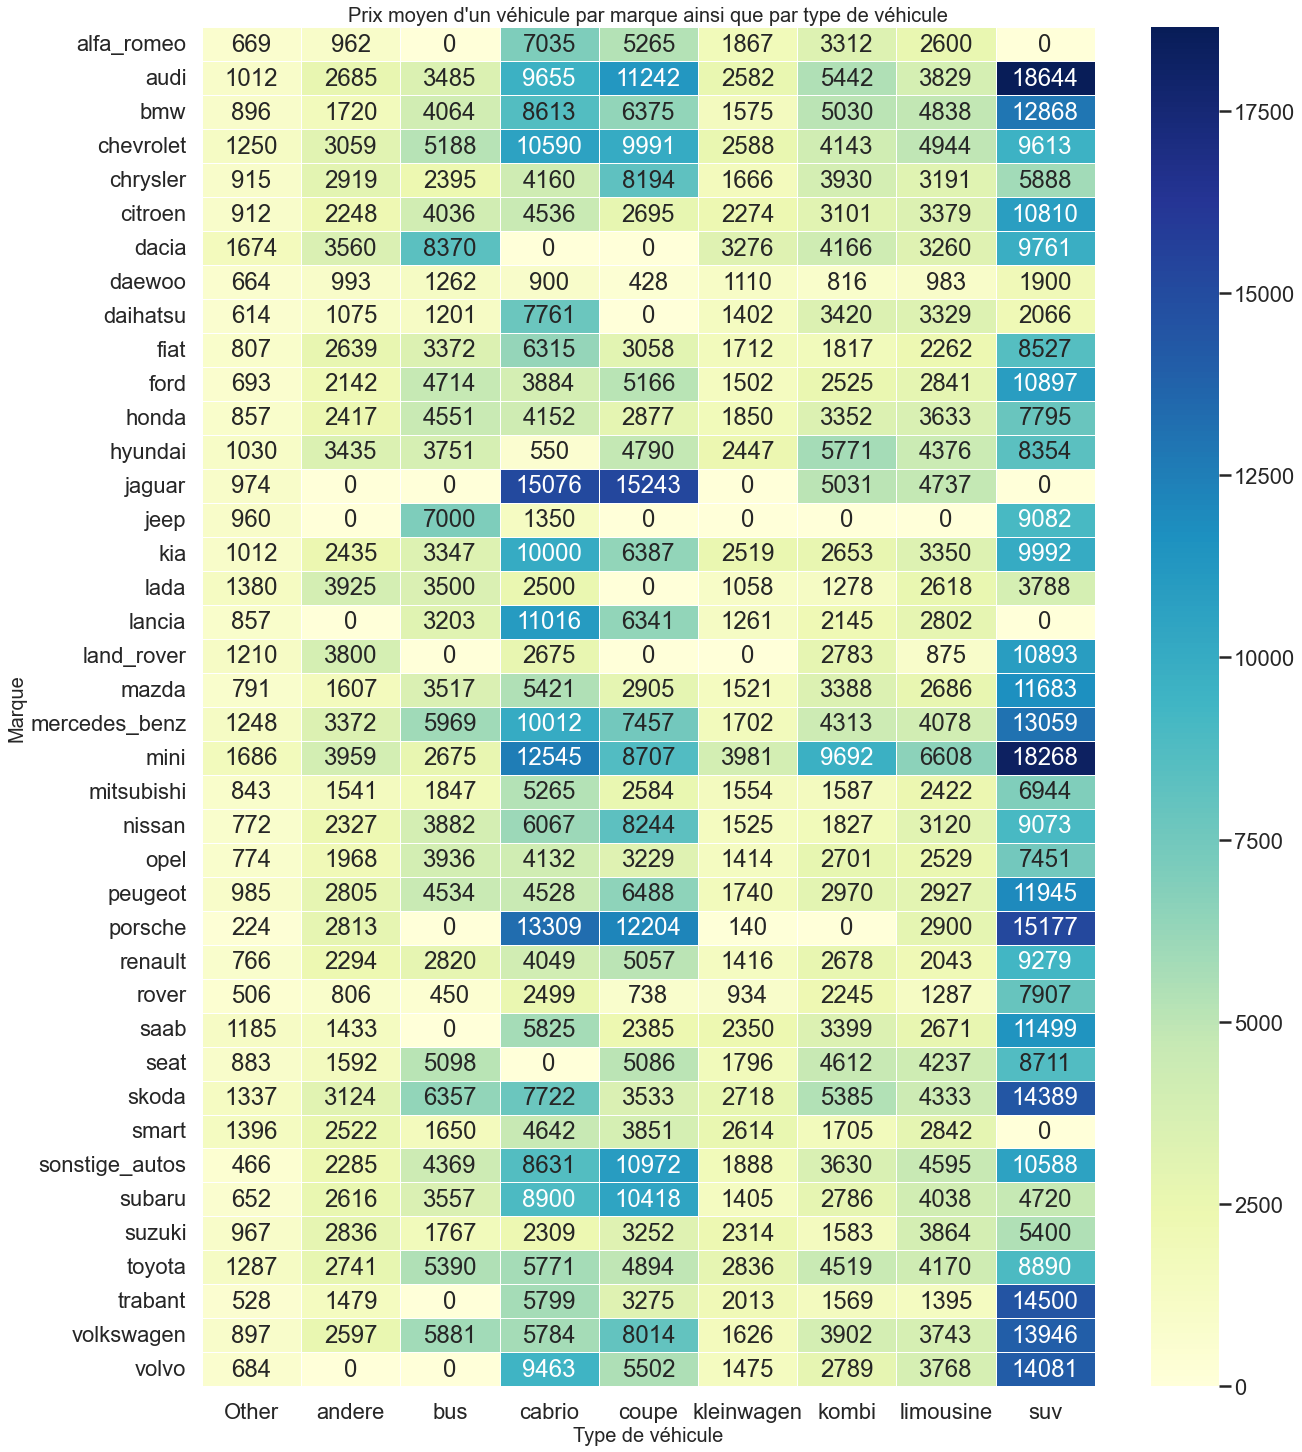

In [584]:
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(20,25))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Prix moyen d'un véhicule par marque ainsi que par type de véhicule",fontdict={'size':20})
ax.xaxis.set_label_text("Type de véhicule",fontdict= {'size':20})
ax.yaxis.set_label_text("Marque",fontdict= {'size':20})
plt.show()

In [585]:
fig.savefig((abs_path + "/Plots/heatmap-price-brand-vehicleType.png"))

In [599]:
df.shape

(329, 27)

In [588]:
DF = df

In [589]:
import glob
import sys

In [600]:
search_term = str(sys.argv[1])

path = abs_path + "/CleanData/DataForAnalysis/" + "audi" # use your path

allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [601]:
frame.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-10 18:39:50,A3_2.0_TDI_Ambition,privat,Offer,2900,test,andere,2003,Unspecified,0,...,97996,2016-03-10 18:39:50,2016,2016.0,March,March,0.0,18.0,13.0,2.0
1,2016-03-27 03:02:04,Audi_A3_2.0_FSI_Ambiente,privat,Offer,4990,test,andere,2003,manuell,150,...,74676,2016-03-30 14:46:54,2016,2016.0,March,March,3.0,14.0,13.0,3.0
2,2016-03-24 09:46:49,Audi_a3_1.6,privat,Offer,2999,control,andere,2003,manuell,102,...,69181,2016-03-28 17:45:29,2016,2016.0,March,March,4.0,17.0,13.0,3.0
3,2016-03-26 19:49:59,Audi_A2_90_PS_Akoyasilber_Klimaautomatik,privat,Offer,5250,control,andere,2004,manuell,90,...,63263,2016-04-06 21:44:49,2016,2016.0,March,March,11.0,21.0,12.0,3.0
4,2016-03-19 11:49:43,Audi_A3_1.8T_Ambition__Kupplung_und_Turbo_fast...,privat,Offer,2200,test,andere,2001,manuell,150,...,75446,2016-03-20 13:44:50,2016,2016.0,March,March,1.0,13.0,15.0,2.0


In [602]:
frame.shape

(25237, 27)

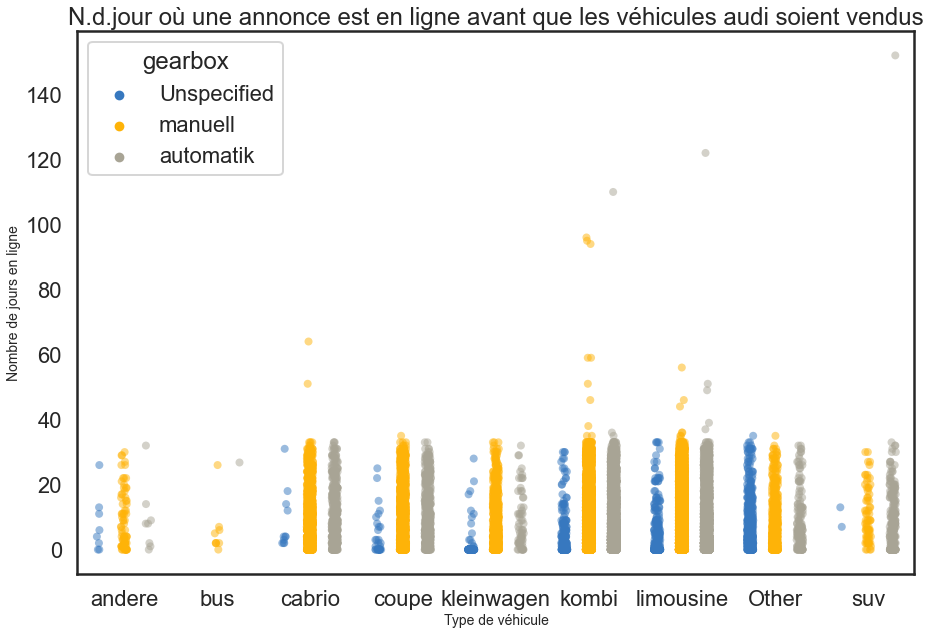

In [603]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(15,10))
sns.set_palette(sns.xkcd_palette(colors))
sns.stripplot(x="vehicleType", y="NoOfDaysOnline", hue="gearbox", dodge=True, data=frame,size=8, alpha=0.5, jitter=True)
ax.set_title("N.d.jour où une annonce est en ligne avant que les véhicules audi soient vendus")
ax.xaxis.set_label_text("Type de véhicule",fontdict= {'size':14})
ax.yaxis.set_label_text("Nombre de jours en ligne",fontdict= {'size':14})
plt.show()

In [604]:
fig.savefig((abs_path + "/Plots/vehicletype-NoOfDaysOnline.png"))

In [611]:
DF.shape

(313683, 27)